# Tunnel network passing

In [1]:
import sys
sys.path.append('../')
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.tunnels import detect_tunnels, TunnelPassingControl

import shapely
import numpy as np
from matplotlib import pyplot as plt

from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely import Polygon,LineString,Point


%load_ext autoreload
%autoreload 2

from panav.SAMP import SA_MILP_Planning
from panav.util import unique_tx, interpolate_positions

In [2]:

bloating_r = 0.5

d = 2
K = 10
t0 = 0
vmax = 1.0
interp_dt = 0.1

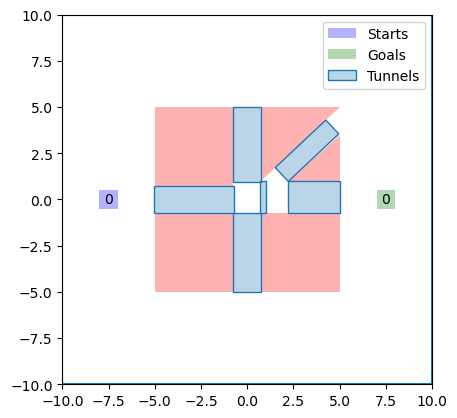

In [39]:
start_locs = np.array([[-7.5,0.0]])
goal_locs = np.array([[7.5,0.0]])

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]


o1 = Box2DRegion((-5.0,-.75),(-5.0,-.75))
o2 = Box2DRegion((-5.0,-.75),(.75,5))

o3 = Box2DRegion((.75,5),(-5.0,-.75))

# o4 = Box2DRegion((.75,5),(.75,5))

o4 = PolygonRegion([(.75,5),(.75,1.0),(5.0,5.0)])
o5 = PolygonRegion([(5,1.0),(2.25,1.0),(5.0,3.5)])


obstacles = [o1,o2,o3,o4,o5]

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,obstacles,starts,goals)

ax = plt.gca()

draw_env(env,ax=ax)
        

labeled = False
tunnels = detect_tunnels(env,bloating_r)
for tunnel in tunnels:
    plot_polygon(tunnel.region,ax=ax,label='Tunnels' if not labeled else None,add_points =False)
    labeled=True
    
ax.legend()
plt.show()